# objective: fit the naive_bayes model on titanic dataset

# import the library

In [1]:
import pandas as pd
import numpy as np 

# Load the dataset

In [3]:
data=pd.read_csv('C:\\titanicsurvival.csv')

In [4]:
data

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


# check whether missing value 

In [5]:
data.columns[data.isna().any()]

Index(['Age'], dtype='object')

# fill the missing value

In [6]:
data.Age=data.Age.fillna(data.Age.median())

In [7]:
data.isnull().any()

Pclass      False
Sex         False
Age         False
Fare        False
Survived    False
dtype: bool

# for converting attribute in integer

In [8]:
#data.Sex=data.Sex.map({'female':0,'male':1}) # by mapping 
#by lableEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data.Sex=lb.fit_transform(data.Sex)

In [9]:
data

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,28.0,23.4500,0
889,1,1,26.0,30.0000,1


# separate the data into x and y 

In [10]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

# spliting the dataset into train and test data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

# feature scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

# fit the naive_bayes model

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(x_train,y_train)
model.score(x_test,y_test)

0.8251121076233184

# Predict value of test data

In [15]:
ypred=model.predict(x_test)
ypred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

# find the accuracy score and confusion matrix

In [18]:
from sklearn.metrics import*
print(accuracy_score(ypred,y_test))

0.8251121076233184


In [22]:
con=confusion_matrix(ypred,y_test)
con

array([[129,  21],
       [ 18,  55]], dtype=int64)

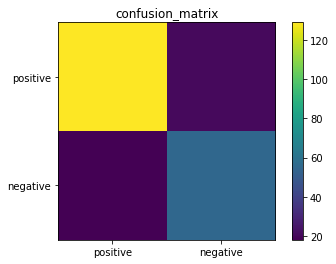

In [27]:
import matplotlib.pyplot as plt
plt.imshow(con,interpolation='nearest')
plt.title('confusion_matrix')
labels=['positive','negative']
tick=np.arange(len(labels))
plt.xticks(tick,labels)
plt.yticks(tick,labels)
plt.colorbar()

naive_bayes model fit to the data and prediction given with accuracy appoximate 83%